# UFC Analysis

Source: https://www.kaggle.com/datasets/aaronfriasr/ufc-fighters-statistics

Purpose: To perform exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Mouth\Documents\Datasets\UFC_Data-Analysis\ufc-fighters-statistics.csv')

In [3]:
df.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


## Cleaning and Transforming Data


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

In [5]:
# Remove unnecessary columns
df_clean = df.drop(columns=['nickname', 'height_cm', 'reach_in_cm', 'date_of_birth'])

In [6]:
# Drop all rows with null values in weight_in_kg column
df_clean = df_clean[~df_clean['weight_in_kg'].isna()]

In [7]:
# Replace all null values in the stance column with Free Stance
df_clean['stance'].fillna('Free Stance', inplace=True)

In [9]:
# Add some more columnns
df_clean['total_fights'] = df_clean['wins'] + df_clean['losses'] + df_clean['draws']
df_clean['win_pct'] = round(df_clean['wins'] / df_clean['total_fights'] * 100, 1)
df_clean['loss_pct'] = round(df_clean['losses'] / df_clean['total_fights'] * 100, 1)
df_clean['draw_pct'] = round(df_clean['draws'] / df_clean['total_fights'] * 100, 1)

In [10]:
# Convert weight column into pounds (lbs) rounded to 1 decimal, formula is pounds = kilograms × 2.204623
df_clean['weight_in_lbs'] = round(df_clean['weight_in_kg'] * 2.204623, 1)

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 4110
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4024 non-null   object 
 1   wins                                          4024 non-null   int64  
 2   losses                                        4024 non-null   int64  
 3   draws                                         4024 non-null   int64  
 4   weight_in_kg                                  4024 non-null   float64
 5   stance                                        4024 non-null   object 
 6   significant_strikes_landed_per_minute         4024 non-null   float64
 7   significant_striking_accuracy                 4024 non-null   float64
 8   significant_strikes_absorbed_per_minute       4024 non-null   float64
 9   significant_strike_defence                    4024 non-null   f

In [18]:
# Assign a weight class to each fighter
condlist = [
    df_clean['weight_in_lbs'] <= 116, # Strawweight
    (df_clean['weight_in_lbs'] > 116) & (df_clean['weight_in_lbs'] <= 126), # Flyweight
    (df_clean['weight_in_lbs'] > 126) & (df_clean['weight_in_lbs'] <= 136), # Bantamweight
    (df_clean['weight_in_lbs'] > 136) & (df_clean['weight_in_lbs'] <= 146), # Featherweight
    (df_clean['weight_in_lbs'] > 146) & (df_clean['weight_in_lbs'] <= 156), # Lightweight
    (df_clean['weight_in_lbs'] > 156) & (df_clean['weight_in_lbs'] <= 176), # Welterweight
    (df_clean['weight_in_lbs'] > 176) & (df_clean['weight_in_lbs'] <= 186), # Middleweight
    (df_clean['weight_in_lbs'] > 186) & (df_clean['weight_in_lbs'] <= 206), # Light heavyweight
    (df_clean['weight_in_lbs'] > 206) & (df_clean['weight_in_lbs'] <= 266), # Heavyweight
]

weight_classes = ["Strawweight", "Flyweight", "Bantamweight", "Featherweight", "Lightweight", "Welterweight",
              "Middleweight", "Light heavyweight", "Heavyweight"]

df_clean['weight_class'] = np.select(condlist, weight_classes, 'Unknown')

In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 4110
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4024 non-null   object 
 1   wins                                          4024 non-null   int64  
 2   losses                                        4024 non-null   int64  
 3   draws                                         4024 non-null   int64  
 4   weight_in_kg                                  4024 non-null   float64
 5   stance                                        4024 non-null   object 
 6   significant_strikes_landed_per_minute         4024 non-null   float64
 7   significant_striking_accuracy                 4024 non-null   float64
 8   significant_strikes_absorbed_per_minute       4024 non-null   float64
 9   significant_strike_defence                    4024 non-null   f

In [21]:
df_clean.describe()

,wins,losses,draws,weight_in_kg,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,total_fights,win_pct,loss_pct,draw_pct,weight_in_lbs
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4016.000000,4016.000000,4016.000000,4024.000000
mean,12.579274,5.791252,0.269384,77.395825,2.485808,36.214960,3.198805,43.452038,1.274645,26.817346,39.776590,0.618340,18.639911,66.552963,32.305528,1.140588,170.629970
std,9.348591,5.116798,0.830081,17.982242,1.980797,19.958763,2.841116,21.773589,1.946262,28.723885,34.320303,1.509941,13.497841,18.791370,18.561594,3.454697,39.643214
min,0.000000,0.000000,0.000000,47.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000
25%,7.000000,2.000000,0.000000,65.770000,0.920000,28.000000,1.660000,37.000000,0.000000,0.000000,0.000000,0.000000,10.000000,60.000000,21.400000,0.000000,145.000000
50%,11.000000,5.000000,0.000000,77.110000,2.380000,41.000000,2.980000,50.000000,0.640000,25.000000,44.000000,0.000000,16.000000,69.200000,30.000000,0.000000,170.000000
75%,17.000000,8.000000,0.000000,83.910000,3.630000,49.000000,4.260000,58.000000,1.970000,45.000000,66.000000,0.700000,24.000000,77.800000,38.500000,0.000000,185.000000
max,253.000000,83.000000,11.000000,349.270000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000,316.000000,100.000000,100.000000,75.000000,770.000000


## Analysis

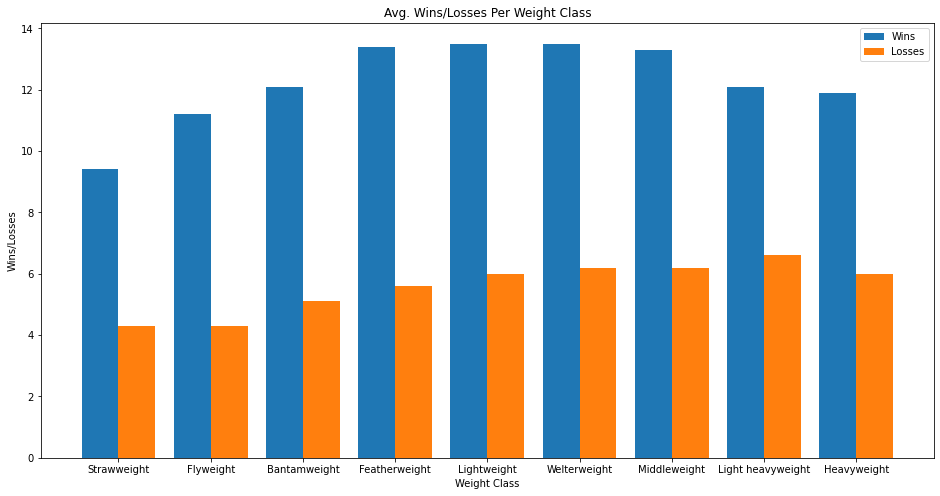

In [82]:
# What is the average wins and losses in each weight division?
weight_classes = ["Strawweight", "Flyweight", "Bantamweight", "Featherweight", "Lightweight", "Welterweight",
              "Middleweight", "Light heavyweight", "Heavyweight"]

# Find mean wins and losses for each weight class
mean_wins = round(df_clean.groupby('weight_class')['wins'].mean().filter(like='weight', axis=0), 1)
mean_loss = round(df_clean.groupby('weight_class')['losses'].mean().filter(like='weight', axis=0), 1)

# Order each weight class from lightest to heaviest
mean_wins_ordered = [mean_wins[weight] for weight in weight_classes]
mean_loss_ordered = [mean_loss[weight] for weight in weight_classes]

# Plot double bar graph
N = len(weight_classes) 
r = np.arange(N)

plt.figure(figsize=(16,8))

plt.bar(r - 0.2, mean_wins_ordered, 0.4, label='Wins')
plt.bar(r + 0.2, mean_loss_ordered, 0.4, label='Losses')

plt.title('Avg. Wins/Losses Per Weight Class')
plt.xticks(r, weight_classes)
plt.xlabel('Weight Class')
plt.ylabel('Wins/Losses')
plt.legend()
plt.show()

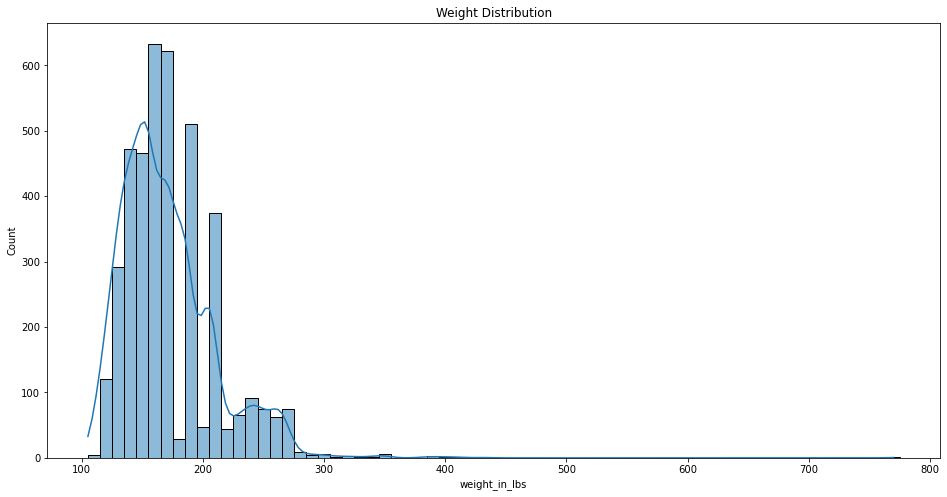

In [108]:
# Weight distribution 
plt.figure(figsize=(16,8))
sns.histplot(data=df_clean, x='weight_in_lbs', binwidth=10, kde=True)
plt.title('Weight Distribution')
plt.show()

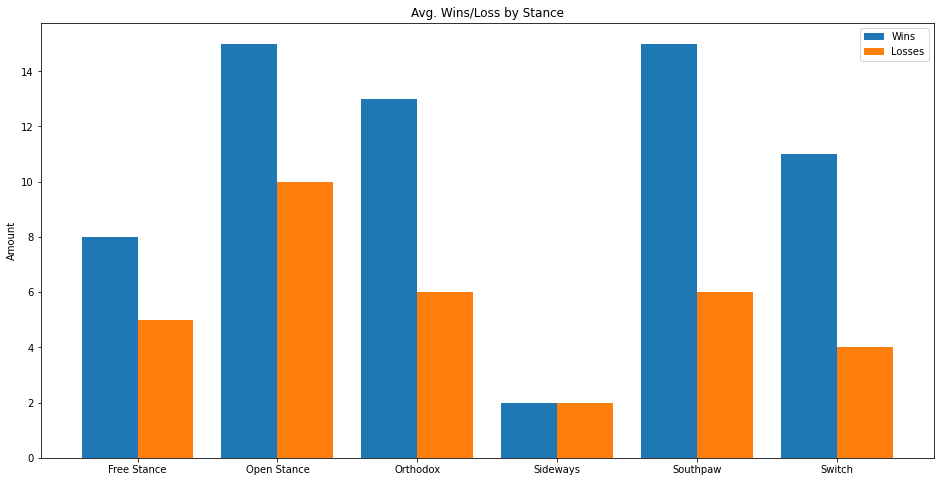

In [148]:
# Avg. Wins/Losses per stance

# Group by stance and find the mean wins and losses
stance_avg = round(df_clean.groupby('stance')[['wins', 'losses']].mean()).reset_index()

# Plot in a stacked bar graph
N = len(stance_avg['stance'])
r = np.arange(N)

plt.figure(figsize=(16,8))

plt.bar(r - 0.2, stance_avg['wins'], 0.4, label='Wins')
plt.bar(r + 0.2, stance_avg['losses'], 0.4, label='Losses')

plt.title('Avg. Wins/Loss by Stance')
plt.xticks(r, stance_avg['stance'].unique())
plt.ylabel('Amount')
plt.legend()
plt.show()

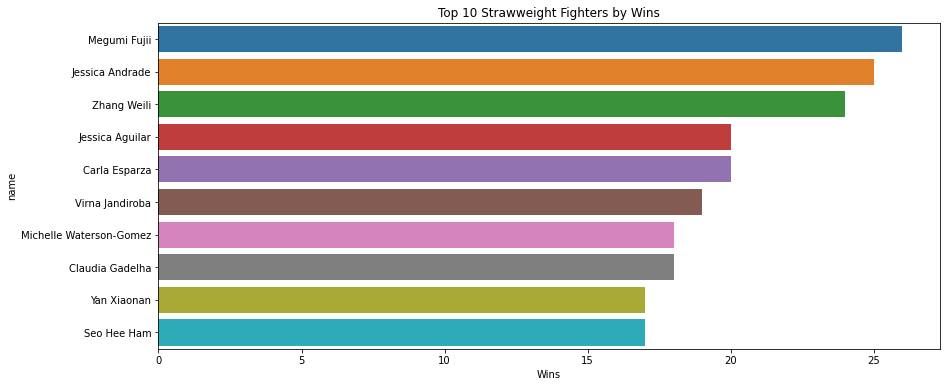

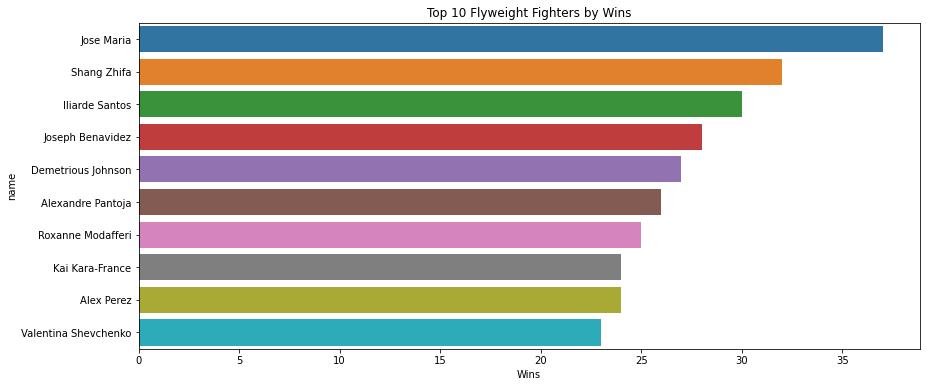

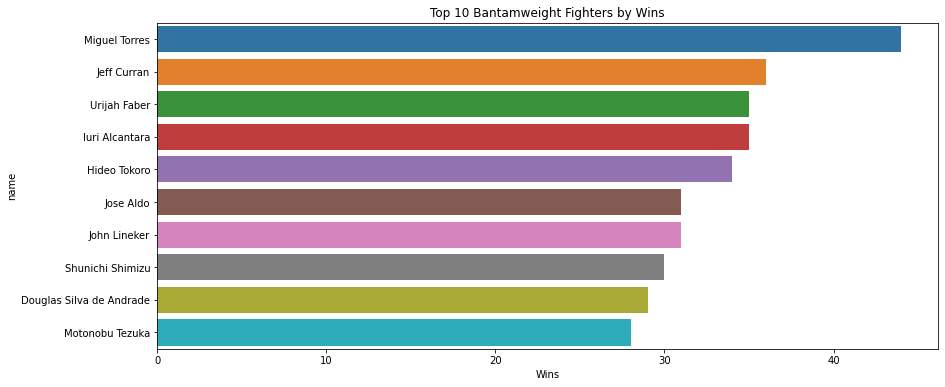

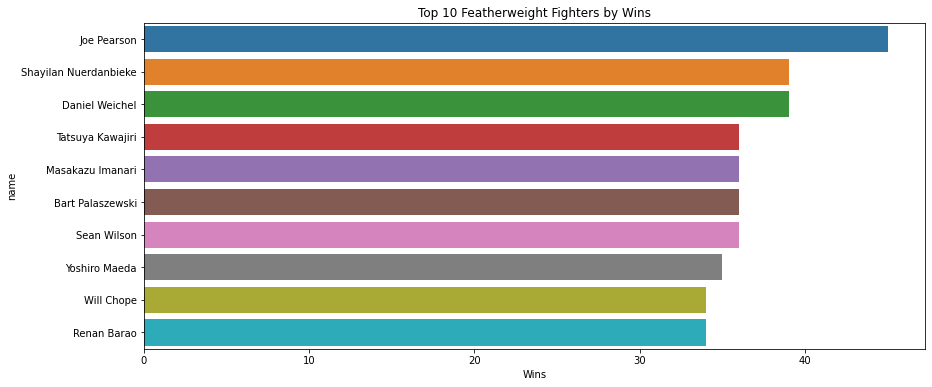

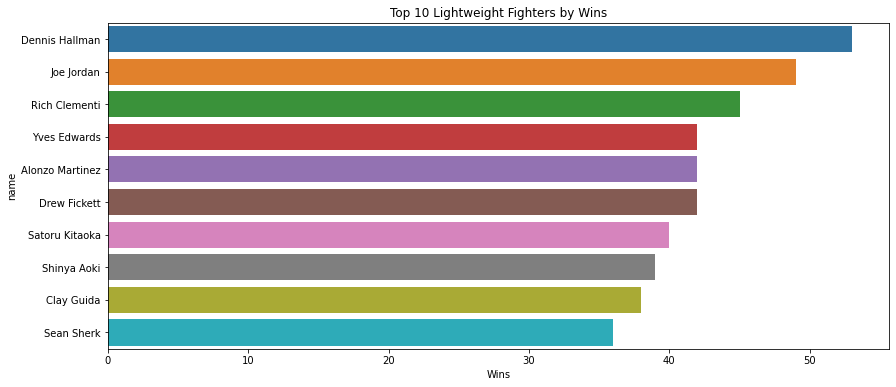

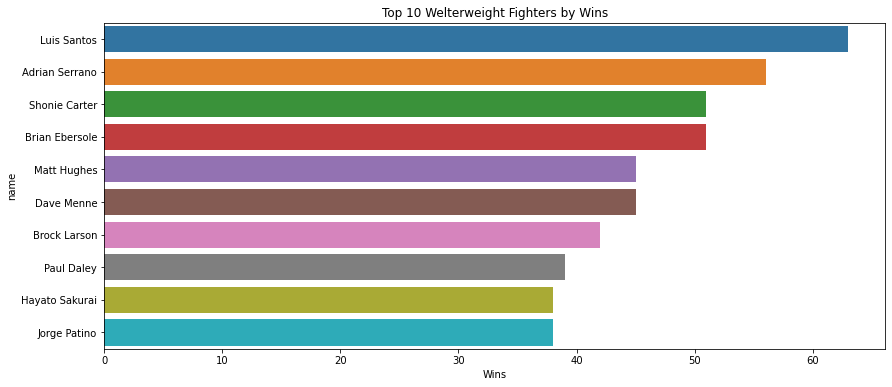

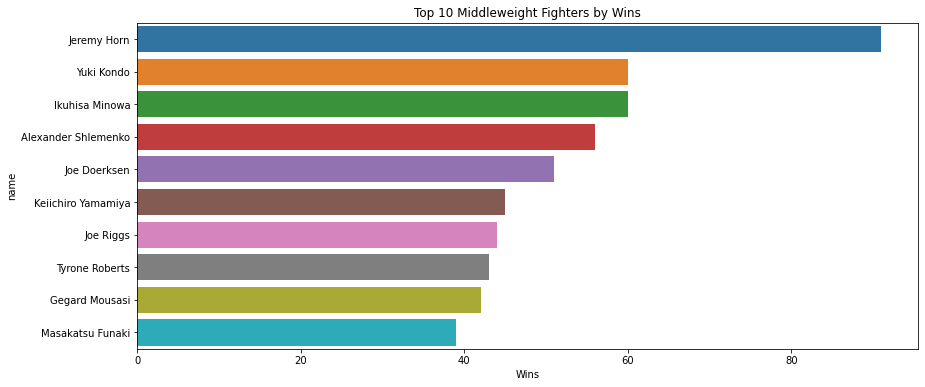

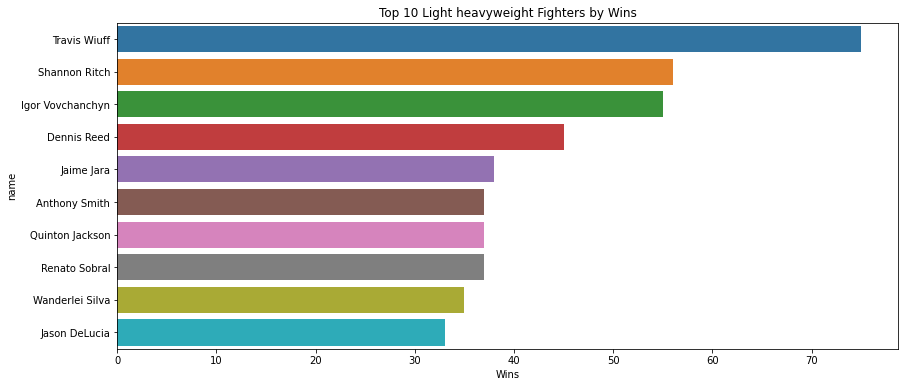

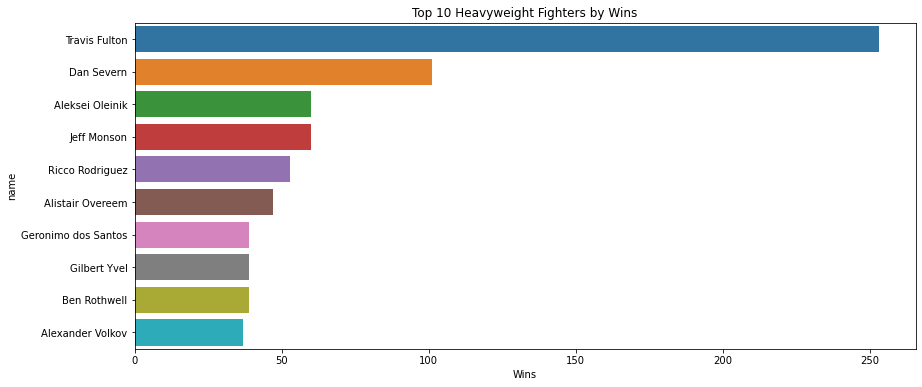

In [122]:
# Top 10 fighters with the most wins in each division
weight_classes = ["Strawweight", "Flyweight", "Bantamweight", "Featherweight", "Lightweight", "Welterweight",
              "Middleweight", "Light heavyweight", "Heavyweight"]

# Filter through each weight class
for weight in weight_classes:
    # Sort by wins in descending order and limit to 10 rows
    top10 = df_clean[df_clean['weight_class'] == weight].sort_values(by=['wins'], ascending=False).iloc[:10].reset_index()
    
    # Plot 
    plt.figure(figsize=(14,6))
    sns.barplot(data=top10, y='name', x='wins')
    plt.title('Top 10 ' + weight + ' Fighters by Wins')
    plt.xlabel('Wins')
    plt.show()

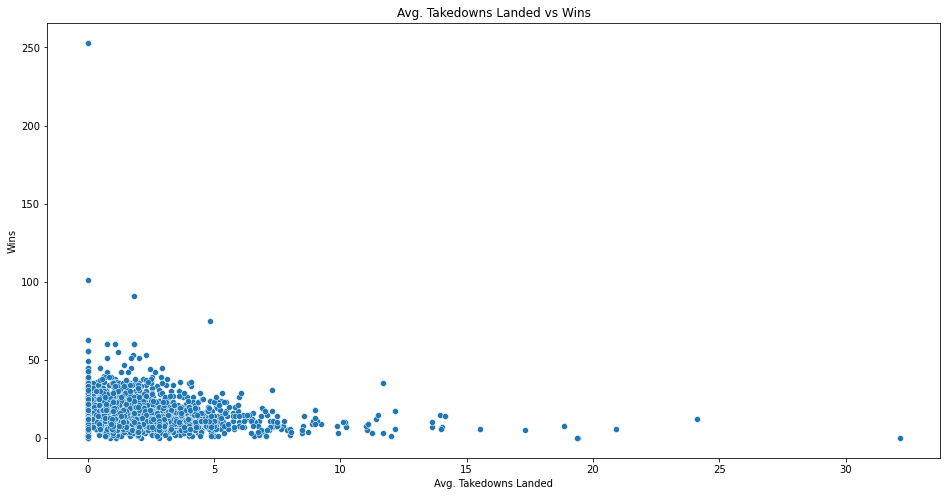

In [43]:
# Relationship between average takedowns landed vs wins
plt.figure(figsize=(16,8))
sns.scatterplot(data=df_clean, x='average_takedowns_landed_per_15_minutes', y='wins')
plt.title('Avg. Takedowns Landed vs Wins')
plt.xlabel('Avg. Takedowns Landed')
plt.ylabel('Wins')
plt.show()

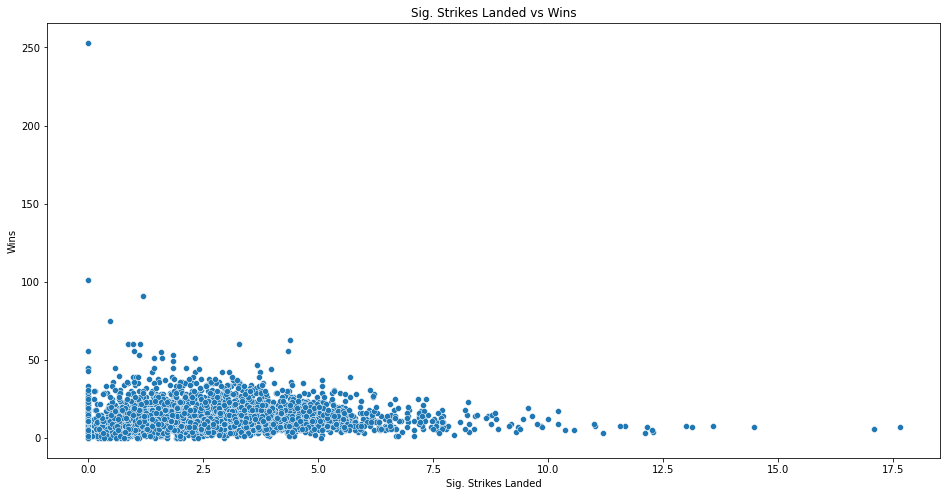

In [42]:
# Relationship between significant strikes landed per minute vs wins
plt.figure(figsize=(16,8))
sns.scatterplot(data=df_clean, x='significant_strikes_landed_per_minute', y='wins')
plt.title('Sig. Strikes Landed vs Wins')
plt.xlabel('Sig. Strikes Landed')
plt.ylabel('Wins')
plt.show()

In [48]:
# What is the average sig. strikes and takedowns landed in the UFC for a figher?
avg_sig_strike = df_clean['significant_strikes_landed_per_minute'].mean()
avg_takedowns_landed = df_clean['average_takedowns_landed_per_15_minutes'].mean()

print("Average Significant Strikes: ", round(avg_sig_strike, 1))
print("Average Takedowns Landed: ", round(avg_takedowns_landed, 1))

Average Significant Strikes:  2.5
Average Takedowns Landed:  1.3


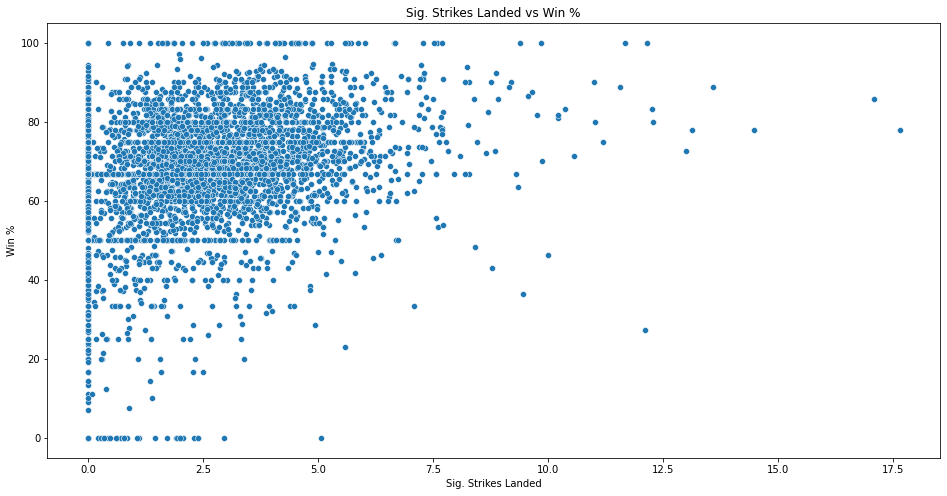

In [83]:
# Relationship between significant strikes landed and win %
plt.figure(figsize=(16,8))
sns.scatterplot(data=df_clean, x='significant_strikes_landed_per_minute', y='win_pct')
plt.title('Sig. Strikes Landed vs Win %')
plt.xlabel('Sig. Strikes Landed')
plt.ylabel('Win %')
plt.show()

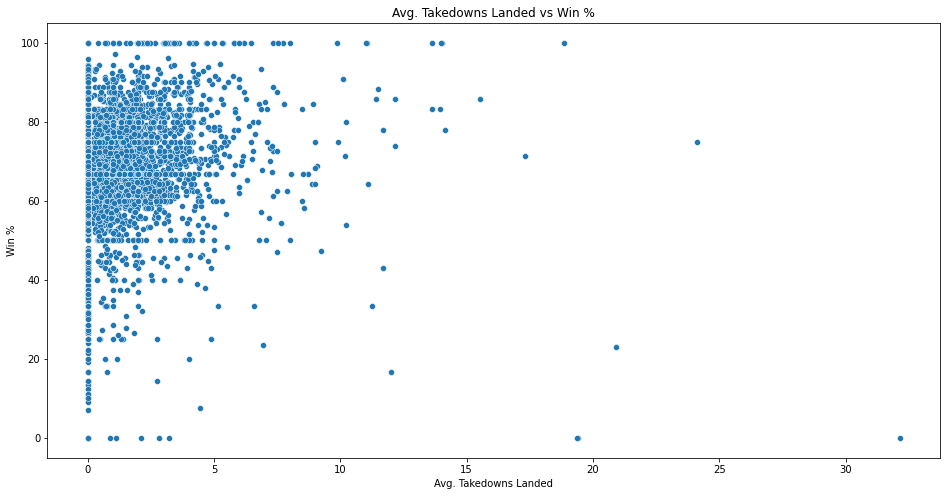

In [84]:
# Relationship between average takedowns landed vs win %
plt.figure(figsize=(16,8))
sns.scatterplot(data=df_clean, x='average_takedowns_landed_per_15_minutes', y='win_pct')
plt.title('Avg. Takedowns Landed vs Win %')
plt.xlabel('Avg. Takedowns Landed')
plt.ylabel('Win %')
plt.show()

In [88]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 4110
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4024 non-null   object 
 1   wins                                          4024 non-null   int64  
 2   losses                                        4024 non-null   int64  
 3   draws                                         4024 non-null   int64  
 4   weight_in_kg                                  4024 non-null   float64
 5   stance                                        4024 non-null   object 
 6   significant_strikes_landed_per_minute         4024 non-null   float64
 7   significant_striking_accuracy                 4024 non-null   float64
 8   significant_strikes_absorbed_per_minute       4024 non-null   float64
 9   significant_strike_defence                    4024 non-null   f

In [151]:
df_clean.iloc[:, 6:14].describe()

,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,2.485808,36.214960,3.198805,43.452038,1.274645,26.817346,39.776590,0.618340
std,1.980797,19.958763,2.841116,21.773589,1.946262,28.723885,34.320303,1.509941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,28.000000,1.660000,37.000000,0.000000,0.000000,0.000000,0.000000
50%,2.380000,41.000000,2.980000,50.000000,0.640000,25.000000,44.000000,0.000000
75%,3.630000,49.000000,4.260000,58.000000,1.970000,45.000000,66.000000,0.700000
max,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000


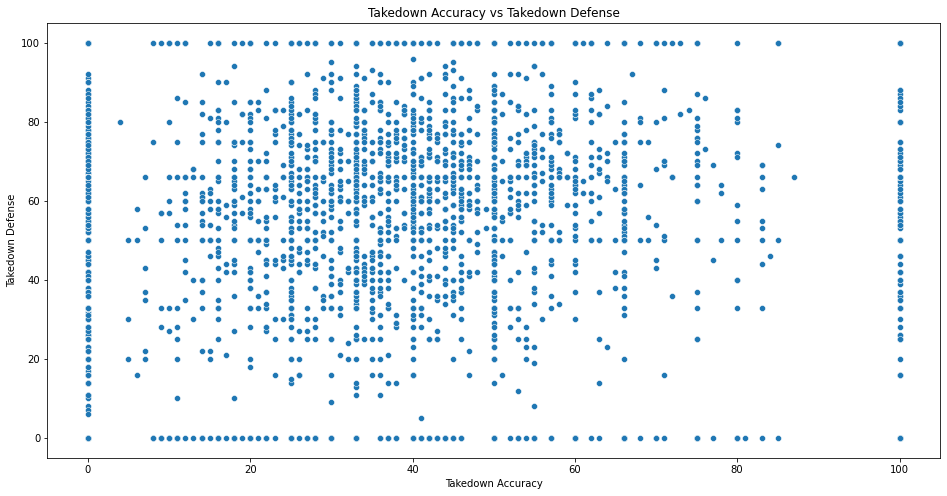

In [109]:
# Correlation between a fighters takedown accuracy and takedown defense
plt.figure(figsize=(16,8))
sns.scatterplot(data=df_clean, x='takedown_accuracy', y='takedown_defense')
plt.title('Takedown Accuracy vs Takedown Defense')
plt.xlabel('Takedown Accuracy')
plt.ylabel('Takedown Defense')
plt.show()

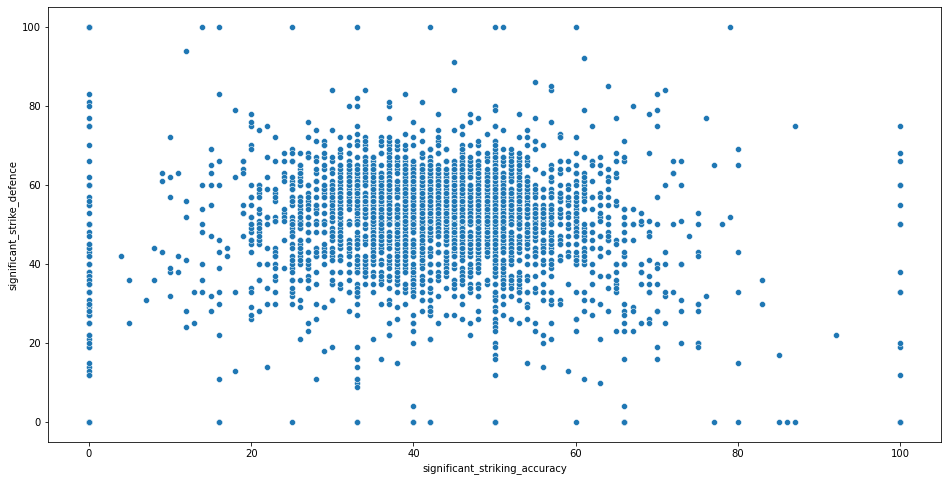

In [158]:
# Correlation between sig. striking accuracy and sig. striking defense
plt.figure(figsize=(16,8))
sns.scatterplot(data=df_clean, x='significant_striking_accuracy', y='significant_strike_defence')
plt.show()

<AxesSubplot:xlabel='significant_striking_accuracy'>

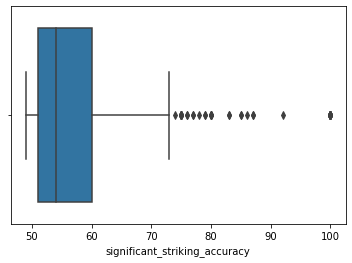

In [161]:
# The average striking defense of top 25% of fighters (Q3)
sns.boxplot(data=top25, x='significant_striking_accuracy')

80.5


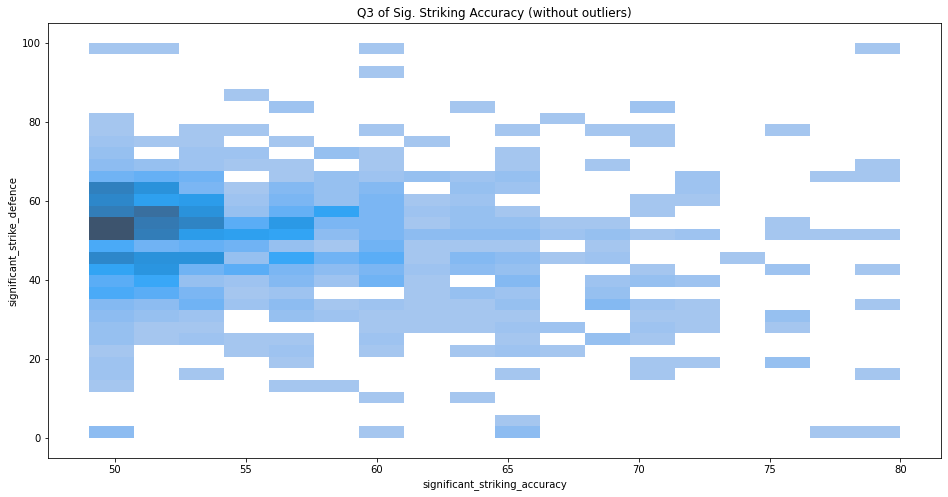

In [169]:
# The top 25% of fighters striking (without outliers)
Q1 = 28
Q3 = 49
IQR = Q3-Q1

maximum_val = Q3 + 1.5*IQR

top25 = df_clean[(df_clean['significant_striking_accuracy'] >= Q3) &
                 (df_clean['significant_striking_accuracy'] <= maximum_val)
                ]
plt.figure(figsize=(16,8))
sns.histplot(data=top25, 
                x='significant_striking_accuracy', y='significant_strike_defence')
plt.title('Q3 of Sig. Striking Accuracy (without outliers)')
plt.show()

In [172]:
# The average striking defense and striking accuracy of fighters in Q3 of striking accuracy
top25.sort_values(by=['significant_striking_accuracy'], ascending=False).iloc[:10]

,name,wins,losses,draws,weight_in_kg,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,total_fights,win_pct,loss_pct,draw_pct,weight_in_lbs,weight_class
3584,Justin Gonzales,6,0,0,65.77,Orthodox,6.67,80.0,0.87,43.0,14.00,73.0,100.0,0.0,6,100.0,0.0,0.0,145.0,Featherweight
4099,Jamelle Jones,7,5,0,92.99,Orthodox,1.78,80.0,3.11,65.0,0.00,0.0,0.0,0.0,12,58.3,41.7,0.0,205.0,Light heavyweight
2173,Kim Couture,3,8,0,61.23,Orthodox,12.12,80.0,2.31,69.0,0.00,0.0,0.0,0.0,11,27.3,72.7,0.0,135.0,Bantamweight
3325,Stephanie Webber,2,2,0,61.23,Free Stance,0.91,80.0,3.85,15.0,6.79,40.0,0.0,0.0,4,50.0,50.0,0.0,135.0,Bantamweight
142,Allen Berube,4,3,0,70.31,Orthodox,0.92,80.0,0.92,33.0,6.87,100.0,0.0,3.4,7,57.1,42.9,0.0,155.0,Lightweight
159,Samandar Murodov,8,0,0,77.11,Orthodox,3.41,80.0,0.80,0.0,3.01,100.0,0.0,3.0,8,100.0,0.0,0.0,170.0,Welterweight
15,Kenny Ento,14,15,0,87.09,Free Stance,8.41,79.0,0.00,100.0,5.49,100.0,0.0,11.0,29,48.3,51.7,0.0,192.0,Light heavyweight
879,Danilo Marques,11,4,0,92.99,Orthodox,1.44,79.0,2.52,52.0,3.93,28.0,0.0,0.8,15,73.3,26.7,0.0,205.0,Light heavyweight
655,Julius Anglickas,5,1,0,92.99,Orthodox,4.62,78.0,1.86,50.0,4.47,50.0,60.0,1.1,6,83.3,16.7,0.0,205.0,Light heavyweight
3201,Richie Smullen,3,1,1,70.31,Orthodox,1.98,77.0,2.26,65.0,8.49,66.0,0.0,0.0,5,60.0,20.0,20.0,155.0,Lightweight
